# Assignment #2 - Classification

### <font color="red"> DUE: October 5 (Thursday) 11:00 pm </font>  

<font color="blue"> Ben Poole </font>

# I. Overview

The goal of this object is to test four different models and run a kcross-validation to see which model is the best classifier for my data. The four models will be perceptron, logestic regression, QDA and LDA. I will run a 5 fold cross-validation on these models which will split my data into 5 groups and alternate which group is my test, train and validation set. I should see the results of the best accuracies for each parameter on each model and then apply that to my test set for the optimal accuracy. This should hopefully give me the best accuracies so then I can get the best classification. The data I plan on using are the iris data set and letter distinction data set. 

# II. Data
Data Sets
- Iris Data set (https://archive.ics.uci.edu/ml/datasets/iris)
- Letter Data set


## II-a. Iris Data Set



Isris data set is defined by iris sepal and petal length and width. Based on these specifications an iris can be categorized into 3 group, Setosa represented with a 0, Versicolor represented with a 1, and Virginica represented with a 2. There are 50 examples of each iris classification making a total of 150 examples. See table below for measurements and classification.

In [2]:

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv("iris.data", names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris'])
irisdic = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
print(df)

     sepal_length  sepal_width  petal_length  petal_width            iris
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12            4.8          3.0        

The upcoming graphs show the measurement distribution for speal/petal length and width. One thing to keep an eye out for is the spread of clustering when looking at sepal vs patel. Sepal has a more spread out clustering while petal has a tighter clustering.

The below data shows sepal length of all three classifications. Notice the clustering is more spread out.

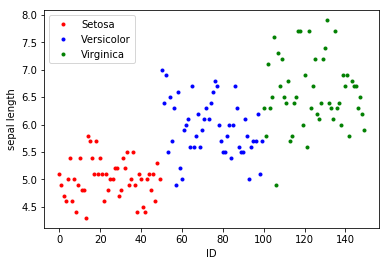

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df.loc[:49, 'sepal_length'], '.', color='r', label='Setosa')
ax.plot(df.loc[50:99, 'sepal_length'], '.', color='b', label='Versicolor')
ax.plot(df.loc[100:149, 'sepal_length'], '.', color='g', label='Virginica')
ax.set_xlabel('ID')
ax.set_ylabel('sepal length')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)


The below data shows sepal width of all three classifications. Notice the clustering is more spread out.

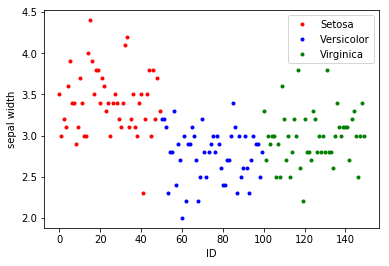

In [4]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df.loc[:49, 'sepal_width'], '.', color='r', label='Setosa')
ax.plot(df.loc[50:99, 'sepal_width'], '.', color='b', label='Versicolor')
ax.plot(df.loc[100:149, 'sepal_width'], '.', color='g', label='Virginica')
ax.set_xlabel('ID')
ax.set_ylabel('sepal width')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

The below data shows petal length for all three classifications. Notice the clustering is tighter.

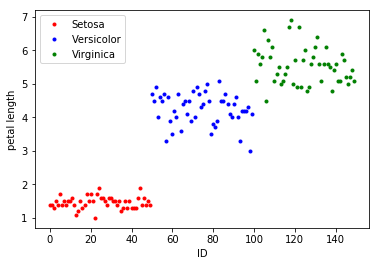

In [5]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df.loc[:49, 'petal_length'], '.', color='r', label='Setosa')
ax.plot(df.loc[50:99, 'petal_length'], '.', color='b', label='Versicolor')
ax.plot(df.loc[100:149, 'petal_length'], '.', color='g', label='Virginica')
ax.set_xlabel('ID')
ax.set_ylabel('petal length')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

The below data shows petal width for all three classifications. Notice the clustering is tighter.

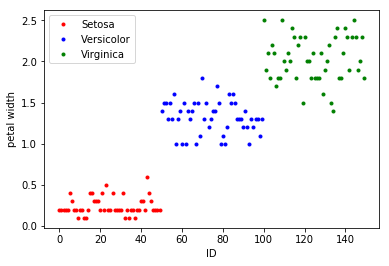

In [6]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df.loc[:49, 'petal_width'], '.', color='r', label='Setosa')
ax.plot(df.loc[50:99, 'petal_width'], '.', color='b', label='Versicolor')
ax.plot(df.loc[100:149, 'petal_width'], '.', color='g', label='Virginica')
ax.set_xlabel('ID')
ax.set_ylabel('petal width')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

## II-b. Letter Recognition Data Set


The data I decided to work with is letter classification. To simplifiy my data I have reduced the orginal data from 20,000 results that contains all 26 letters and their measuements to only 162 results than only cotains A's and B's. There are 81 A examples and 81 B examples, evenly splitting my data. I should note that the original data, the 20,000, is randomized and is not sorted alphabeticly. In order to get a random selection of A's and B's I imported the first 2000 results then sorted and calculated a number that would give me a even number of A's and B's. A will be represented by 0 or -1 and B will be represented by 1.

Attribute Information:
	 1.	lettr	capital letter	(26 values from A to Z)
	 2.	x-box	horizontal position of box	(integer)
	 3.	y-box	vertical position of box	(integer)
	 4.	width	width of box			(integer)
	 5.	high 	height of box			(integer)
	 6.	onpix	total # on pixels		(integer)
	 7.	x-bar	mean x of on pixels in box	(integer)
	 8.	y-bar	mean y of on pixels in box	(integer)
	 9.	x2bar	mean x variance			(integer)
	10.	y2bar	mean y variance			(integer)
	11.	xybar	mean x y correlation		(integer)
	12.	x2ybr	mean of x * x * y		(integer)
	13.	xy2br	mean of x * y * y		(integer)
	14.	x-ege	mean edge count left to right	(integer)
	15.	xegvy	correlation of x-ege with y	(integer)
	16.	y-ege	mean edge count bottom to top	(integer)
	17.	yegvx	correlation of y-ege with x	(integer)


In [7]:
df2 = pd.read_csv("letter-recognition.data", names= ["Letter", "x-box hor", "y-box vert", "box width", "box height", "onpix total", "x-bar", "y-bar", "x2bar", "y2bar", "xybar", "x2ybr", "xy2br", "x-ege", "xegvy", "y-ege", "yegvx" ])
letterDic = {"A": 0, "B":1}
df2 = df2.iloc[:2000, :] # grabs only the first 2000
df2 = df2.sort_values('Letter')
df2 = df2.reset_index()
df2 = df2.drop('index', 1)
df2 = df2.iloc[:162, :] # Create even number for even split
df2 = df2.drop(df2.index[161])
df2 = df2.drop(df2.index[0])
df2 = df2.reset_index()
df2 = df2.drop('index', 1)
df2 # final data I will use

Letter  x-box hor  y-box vert  box width  box height  onpix total  x-bar  \
0        A          2           4          3           2            1      8   
1        A          3           9          6           6            3     11   
2        A          1           3          2           2            1      9   
3        A          3          10          6           8            4     12   
4        A          3           5          5           5            4      9   
5        A          7          12          6           6            3      9   
6        A          3           6          4           4            2      8   
7        A          6           9          8           8            8      8   
8        A          3           7          5           5            3     12   
9        A          6          14          6           8            4     12   
10       A          4           9          6           7            4     10   
11       A          3           6          5           4            3     11   
12       A          3          11          6           8            2      8   
13       A          3           9          6           7            4     11   
14       A          3           8          6           6            4      8   
15       A          3           6          5           4            1      7   
16       A          4          10          7           7            5      7   
17       A          1           0          2           1            0      8   
18       A          3           7          5           5            3     11   
19       A          6           9          6           5            3     13   
20       A          2           7          4           5            2     12   
21       A          3           4          6           6            2      9   
22       A          1           3          2           2            1     10   
23       A          1           1          3           2            1      6   
24       A          1           3          2           2            1     10   
25       A          5           8          8           7            7      8   
26       A          3           9          5           6            3      9   
27       A          2           4          4           3            2     10   
28       A          1           0          2           0            0      8   
29       A          3           6          5           4            2     11   
..     ...        ...         ...        ...         ...          ...    ...   
130      B          4          10          5           8            6      8   
131      B          3           5          5           4            4      9   
132      B          7          11          9           8            7     10   
133      B         11          15         10           8            9      9   
134      B          2           3          4           1            2      8   
135      B          3           5          5           3            3      9   
136      B          4           5          5           7            4      7   
137      B          4           7          6           5            5      7   
138      B          2           4          4           2            2      9   
139      B          5           7          7           5            5      7   
140      B          5           9          7           7            6      7   
141      B          5           4          5           6            4      7   
142      B          5           8          7           7            8      7   
143      B          2           1          3           2            2      8   
144      B          3           7          3           5            4      6   
145      B          6          11          8           8            7      9   
146      B          5           9          5           7            7      6   
147      B          7          11          9           8            7      9   
148 

Letter Distribution

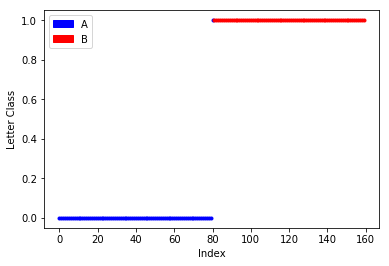

In [17]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sample = df2.iloc[:160, 0]
sample = sample.apply(lambda x: letterDic[x])
A = sample.iloc[:81]
B = sample.iloc[81:160]
ax.plot(A, '.b')
ax.plot(B, '.r')
ax.set_xlabel('Index')
ax.set_ylabel('Letter Class')
blue = mpatches.Patch(color='blue', label='A')
red = mpatches.Patch(color='red', label='B')
ax.legend(handles=[blue, red])

X-Box Distribution: As you can see for most of these distibutions the measurements are fairly close.

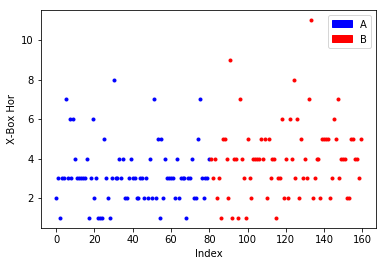

In [8]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
A = df2.iloc[:81, 1]
B = df2.iloc[81:160, 1]
ax.plot(A, '.b')
ax.plot(B, '.r')
ax.set_xlabel('Index')
ax.set_ylabel('X-Box Hor')
blue = mpatches.Patch(color='blue', label='A')
red = mpatches.Patch(color='red', label='B')
ax.legend(handles=[blue, red])

Y-Box Distribution

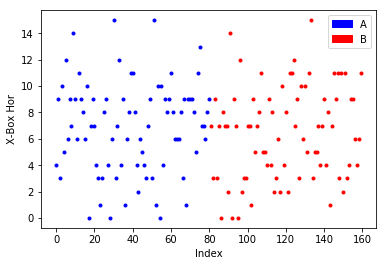

In [9]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
A = df2.iloc[:81, 2]
B = df2.iloc[81:160, 2]
ax.plot(A, '.b')
ax.plot(B, '.r')
ax.set_xlabel('Index')
ax.set_ylabel('X-Box Hor')
blue = mpatches.Patch(color='blue', label='A')
red = mpatches.Patch(color='red', label='B')
ax.legend(handles=[blue, red])

Box Width Distribution

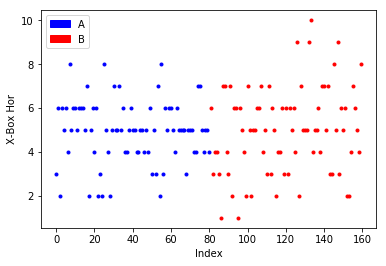

In [10]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
A = df2.iloc[:81, 3]
B = df2.iloc[81:160, 3]
ax.plot(A, '.b')
ax.plot(B, '.r')
ax.set_xlabel('Index')
ax.set_ylabel('X-Box Hor')
blue = mpatches.Patch(color='blue', label='A')
red = mpatches.Patch(color='red', label='B')
ax.legend(handles=[blue, red])

Box Height Distribution

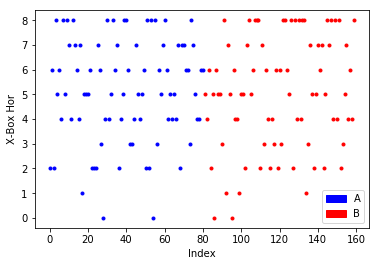

In [11]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
A = df2.iloc[:81, 4]
B = df2.iloc[81:160, 4]
ax.plot(A, '.b')
ax.plot(B, '.r')
ax.set_xlabel('Index')
ax.set_ylabel('X-Box Hor')
blue = mpatches.Patch(color='blue', label='A')
red = mpatches.Patch(color='red', label='B')
ax.legend(handles=[blue, red])

Onpix Total Distribution

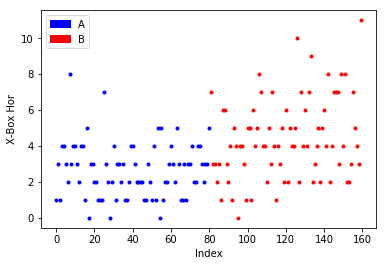

In [18]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
A = df2.iloc[:81, 5]
B = df2.iloc[81:160, 5]
ax.plot(A, '.b')
ax.plot(B, '.r')
ax.set_xlabel('Index')
ax.set_ylabel('X-Box Hor')
blue = mpatches.Patch(color='blue', label='A')
red = mpatches.Patch(color='red', label='B')
ax.legend(handles=[blue, red])

# III. Methods
I will be using perceptron (pocket), QDA, LDA, and Logistic Regression to classify my data. As I introduce the algorithms I will give a brief description about how they work and what they are doing. 

In [13]:
def accuracy(X, mean, std):
    return (X - mean) / std

In [14]:
def confusion_matrix(Y, T):
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

In [15]:
import numpy as np
import abc

class Classifier:
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

Perceptron: Perceptron pocket works by remebering the best solution that is calculated by by summing weights using the below algorithm. With being able to rememebr it can achieve the best prediction for a data set compared to the normal perceptron model.
Algorithm: w(k+1)=w(k)+αtixi

In [16]:
class Perceptron (Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        
    def train(self, X, T, alpha):
        print("Raw X", X.shape)
        X = self.normalize(X)
        X = self.add_ones(X)
        N = X.shape[0]
        self.w = np.zeros(( X.shape[1]))
        print("X", X.shape)
        print("T", T.shape)
        print("w", self.w.shape)
        
        for i in range(1000):
            converged = True
            for k in range(N):
                y = self.w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += alpha * T[k] * X[k]
                    converged = False
            if converged:
                print("converged at ", i)
                break
        
    def use(self, X):
        X =  accuracy(X, self.meanX, self.stdX)
        X = self.add_ones(X)
        Y = X @ self.w.T
        Y = np.sign(Y)
        return Y
    
    

Logistic Regression: : Logistic regression utilizes a similar model to the linear model. One of the big similarities is that it utilizes gradient descent to help predict classifications. A big difference is that logistic regression T uses indicator variables.

In [17]:
class myLog_Regression (Classifier):
    
    def __init__(self, k, D):
        self.k = k
        self.D = D
        Classifier.__init__(self)
    
    def g(self, X):
        z = X @ self.w
        return  np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
        
    def train(self, X, T, alpha):
        print("Raw X", X.shape)
        X = self.normalize(X)
        X = self.add_ones(X)
        N = X.shape[0]
        self.w = np.zeros(( self.D + 1 , self.k))
        print("X", X.shape)
        print("T", T.shape)
        print("w", self.w.shape)
        
        for i in range(1000):
            self.w += alpha * X.T @ (T- self.g(X))
    def use(self, X):
        X =  (X - self.meanX) / self.stdX
        X = self.add_ones(X)
        Y = self.g(X)
        Y1 = np.argmax(Y, 1)
        return Y1

QDA Model: QDA works by computing covariance matrcies for the data and then using these along side a likely hood factor to predict data classifiction. QDA utilizes the discriminate function that works like similar to probabilty but gives a number that relates to the strength of the class.

In [18]:
class myQDA(Classifier):
    
    def __init__(self,):
        Classifier.__init__(self)
        self.mu = []
        self.sigma = []
        self.prior = []
        

        
    def getQDA(self, X, mu, sigma, prior):
        d = []
        for i in range (0, len(mu)):
            detSigma = np.linalg.det(sigma[i])
            sigInv = np.linalg.pinv(sigma[i])
            d.append(-.5 * (np.log(detSigma)) \
            - .5 * np.sum((X - mu[i]) @ sigInv * (X - mu[i]), axis=1)\
            + np.log(prior[i]))
        return d
        
    def train(self, X, T):
        X = self.normalize(X)
        c = len(np.unique(T))      
        
        for i in np.unique(T):
            self.mu.append(np.mean(X[T == i, :], 0))
            self.sigma.append(np.cov(X[T == i, :].T))
            self.prior.append(np.sum(T == i) / X.shape[0])
       
        print("X", X.shape)
        print("T", T.shape)
        
    def use(self, X):
        X = (X - self.meanX) / self.stdX
        d = np.array(self.getQDA(X, self.mu, self.sigma, self.prior))
        pred = np.argmax(d, axis=0)
        return pred
        
       

LDA Model: LDA works great for 2-class problems but falls short when more are introduced. LDA works simarly to QDA but cuts out of the covariance matrix making it cheaper to run. This convariance matrix is now assumed which increases processing speeds.

In [19]:
class myLDA(Classifier):
    
    def __init__(self,):
        Classifier.__init__(self)
        self.mu = []
        self.sigma = np.cov(X.T)
        self.prior = []

        
    def getLDA(self, X, mu, sigma, prior):
        d = []
        for i in range (0, len(mu)):
            sigInv = np.linalg.pinv(sigma)
            d.append(X @ sigInv @ mu[i] - .5 * mu[i].T @ sigInv @ mu[i] + np.log(prior[i]))
        return d
        
    def train(self, X, T):
        X = self.normalize(X)
        c = len(np.unique(T)) 
        
        for i in np.unique(T):
            self.mu.append(np.mean(X[T == i, :], 0))
            self.prior.append(np.sum(T == i) / X.shape[0])
            
    def use(self, X):
        X =  (X - self.meanX) / self.stdX
        d = self.getLDA(X, self.mu, self.sigma, self.prior)
        pred = np.argmax(d, axis=0)
        return pred

K-Cross Validation: 
Cross validation will allow me to test all my models and figure out which modesl work best on my data. Corss validation works by breaking the data into a specified amount of groups (k) and then spliting those groups into 3 predefined groups. These 3 predefined groups are test, train and validation. Validation is only used to train parameters if you have them while test and train are always used. The purpose of this is so that every k-group gets to be a test, train and validation data set, allowing for optimized accuracies.

In [23]:
class K_Validation():
    def __init__(self, ):
        self.testErrs = []
        
    def cross_validation(self, k, X, T, model, alpha=None, Treal=None):
        size = int(len(X) / k)
        Xdata_split = np.split(X, k)
        Tdata_split = np.split(T, k)
        if(Treal != None):
            realTdata_split = np.split(Treal, k)
        best_alpha = None
        testErrs = []
        
        for i in range(k): # Run through tests
            print("NEW TEST", i)
            print("Xdata_split size", len(Xdata_split))
            Xtest = Xdata_split[i]
            Ttest = Tdata_split[i]
            res = np.array([-1,0]) # arbitrary value(will never get selected)
            
            for v in range(k): # Run through validations
                if(alpha != None):
                    if v == i:
                        continue 
                    else:
                        print("NEW VALIDATION", v)
                        Xvalid = Xdata_split[v]
                        Tvalid = Tdata_split[v]
                        print("Tvalid", Tvalid.shape)
                        print("Xvalid", Xvalid.shape)
                        Xtrain = np.row_stack([x for z,x in enumerate(Xdata_split) if z!=v and z!=i])
                        if(len(T.shape) == 1):
                            Ttrain = np.hstack([x for z,x in enumerate(Tdata_split) if z!=v and z!=i])
                        else:
                            Ttrain = np.vstack([x for z,x in enumerate(Tdata_split) if z!=v and z!=i])
                        print("Xtrain Aplha", Xtrain.shape)
                        Ttrain = Ttrain.reshape((Ttrain.shape[0], -1))
                        print("Ttrain Aplha", Ttrain.shape)
                        for p in range(len(alpha)):
                            model.train(Xtrain, Ttrain, alpha[p])
                            predict = model.use(Xvalid)
                            if(Treal != None): # check if log_regression is being used
                                valAcc = np.sum(predict == realTdata_split[v]) / len(predict)
                            else:
                                valAcc = np.sum(predict == Tvalid) / len(predict)
                            res = np.vstack((res, [valAcc, alpha[p]]))
                else:
                    break

            if(alpha != None):
                print("Results:", res)
                best_res = np.argmax(res[:, 0])
                best_alpha =  res[best_res][1]
                print("Best Result:", res[best_res][0])
                Xtrain = np.concatenate((Xtrain, Xvalid),axis=0)
                Ttrain = np.concatenate((Ttrain, Tvalid.reshape(Tvalid.shape[0], -1)),axis=0)
                model.train(Xtrain, Ttrain, best_alpha)
            else:
                Xtrain = np.row_stack([x for z,x in enumerate(Xdata_split) if z!=v])
                Ttrain = np.hstack([x for z,x in enumerate(Tdata_split) if z!=v])
                print("Xtrain !Aplha", Xtrain.shape)
                print("Ttrain !Aplha", Ttrain.shape)
                model.train(Xtrain, Ttrain)
                
            finalPred = model.use(Xtest)
            if(Treal != None): # check if log_regression is being used
                finalAcc = np.sum(finalPred == realTdata_split[i]) / len(finalPred)
            else:
                finalAcc = np.sum(finalPred == Ttest) / len(Ttest)
            testErrs.append((finalAcc,  best_alpha))
            
        return testErrs
        
           

               
                


Iris KCross Validation

In [21]:
alpha = [.1, .01, .001, .0001]
dfrand = df.iloc[np.random.permutation(len(df))]

In [22]:
iris_validation = K_Validation()
iris_percep = Perceptron()
X = dfrand.iloc[:, 0:4]
T = dfrand.iloc[:, 4]
T = T.apply(lambda x: irisdic[x])
T[:50] = 1
T[50:] = -1
iris_percepErrs = iris_validation.cross_validation(5, X.as_matrix(), T.as_matrix(), iris_percep, alpha)
print("Iris Perceptron Errors:\n", iris_percepErrs)

NEW TEST 0
Xdata_split size 5
NEW VALIDATION 1
Tvalid (30,)
Xvalid (30, 4)
Xtrain Aplha (90, 4)
Ttrain Aplha (90, 1)
Raw X (90, 4)
X (90, 5)
T (90, 1)
w (5,)
converged at  1
Raw X (90, 4)
X (90, 5)
T (90, 1)
w (5,)
converged at  1
Raw X (90, 4)
X (90, 5)
T (90, 1)
w (5,)
converged at  1
Raw X (90, 4)
X (90, 5)
T (90, 1)
w (5,)
converged at  1
NEW VALIDATION 2
Tvalid (30,)
Xvalid (30, 4)
Xtrain Aplha (90, 4)
Ttrain Aplha (90, 1)
Raw X (90, 4)
X (90, 5)
T (90, 1)
w (5,)
Raw X (90, 4)
X (90, 5)
T (90, 1)
w (5,)
Raw X (90, 4)
X (90, 5)
T (90, 1)
w (5,)
Raw X (90, 4)
X (90, 5)
T (90, 1)
w (5,)
NEW VALIDATION 3
Tvalid (30,)
Xvalid (30, 4)
Xtrain Aplha (90, 4)
Ttrain Aplha (90, 1)
Raw X (90, 4)
X (90, 5)
T (90, 1)
w (5,)
Raw X (90, 4)
X (90, 5)
T (90, 1)
w (5,)
Raw X (90, 4)
X (90, 5)
T (90, 1)
w (5,)
Raw X (90, 4)
X (90, 5)
T (90, 1)
w (5,)
NEW VALIDATION 4
Tvalid (30,)
Xvalid (30, 4)
Xtrain Aplha (90, 4)
Ttrain Aplha (90, 1)
Raw X (90, 4)
X (90, 5)
T (90, 1)
w (5,)
Raw X (90, 4)
X (90, 5)
T

Iris Perceptron Errors:
 [(0.0, 0.10000000000000001), (0.33333333333333331, 0.10000000000000001), (1.0, 0.10000000000000001), (1.0, 0.10000000000000001), (0.96666666666666667, 0.10000000000000001)]


In [24]:
iris_validation = K_Validation()
iris_log = myLog_Regression(3, 4)
alpha = [.1, .01, .001, .0001]
X = dfrand.iloc[:, 0:4]
T = dfrand.iloc[:, 4]
Tin = np.zeros((T.shape[0], 3))
T = T.apply(lambda x: irisdic[x])
Tin[np.arange(150), T.as_matrix()] = 1


iris_logErrs = iris_validation.cross_validation(5, X.as_matrix(), Tin, iris_log, alpha, T.as_matrix())
print("Iris Log Errors:\n", iris_logErrs)

C:\Users\Loyal\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if __name__ == '__main__':
C:\Users\Loyal\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


NEW TEST 0
Xdata_split size 5
NEW VALIDATION 1
Tvalid (30, 3)
Xvalid (30, 4)
Xtrain Aplha (90, 4)
Ttrain Aplha (90, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
NEW VALIDATION 2
Tvalid (30, 3)
Xvalid (30, 4)
Xtrain Aplha (90, 4)
Ttrain Aplha (90, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
NEW VALIDATION 3
Tvalid (30, 3)
Xvalid (30, 4)
Xtrain Aplha (90, 4)
Ttrain Aplha (90, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
NEW VALIDATION 4
Tvalid (30, 3)
Xvalid (30, 4)
Xtrain Aplha (90, 4)
Ttrain Aplha (90, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4

C:\Users\Loyal\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


NEW TEST 1
Xdata_split size 5
NEW VALIDATION 0
Tvalid (30, 3)
Xvalid (30, 4)
Xtrain Aplha (90, 4)
Ttrain Aplha (90, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
NEW VALIDATION 2
Tvalid (30, 3)
Xvalid (30, 4)
Xtrain Aplha (90, 4)
Ttrain Aplha (90, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
NEW VALIDATION 3
Tvalid (30, 3)
Xvalid (30, 4)
Xtrain Aplha (90, 4)
Ttrain Aplha (90, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
NEW VALIDATION 4
Tvalid (30, 3)
Xvalid (30, 4)
Xtrain Aplha (90, 4)
Ttrain Aplha (90, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4)
X (90, 5)
T (90, 3)
w (5, 3)
Raw X (90, 4

In [25]:
iris_validation = K_Validation()
iris_qda = myQDA()
X = dfrand.iloc[:, 0:4]
T = dfrand.iloc[:, 4]
T = T.apply(lambda x: irisdic[x])

iris_qdaErrs = iris_validation.cross_validation(5, X.as_matrix(), T.as_matrix(), iris_qda)
print(iris_qdaErrs)

NEW TEST 0
Xdata_split size 5
Xtrain !Aplha (120, 4)
Ttrain !Aplha (120,)
X (120, 4)
T (120,)
NEW TEST 1
Xdata_split size 5
Xtrain !Aplha (120, 4)
Ttrain !Aplha (120,)
X (120, 4)
T (120,)
NEW TEST 2
Xdata_split size 5
Xtrain !Aplha (120, 4)
Ttrain !Aplha (120,)
X (120, 4)
T (120,)
NEW TEST 3
Xdata_split size 5
Xtrain !Aplha (120, 4)
Ttrain !Aplha (120,)
X (120, 4)
T (120,)
NEW TEST 4
Xdata_split size 5
Xtrain !Aplha (120, 4)
Ttrain !Aplha (120,)
X (120, 4)
T (120,)
[(1.0, None), (0.96666666666666667, None), (1.0, None), (1.0, None), (0.93333333333333335, None)]


Letter KCross Validation

In [26]:
iris_validation = K_Validation()
iris_lda = myLDA()
X = dfrand.iloc[:, 0:4]
T = dfrand.iloc[:, 4]
T = T.apply(lambda x: irisdic[x])

iris_ldaErrs = iris_validation.cross_validation(5, X.as_matrix(), T.as_matrix(), iris_lda)
print(iris_ldaErrs)

NEW TEST 0
Xdata_split size 5
Xtrain !Aplha (120, 4)
Ttrain !Aplha (120,)
NEW TEST 1
Xdata_split size 5
Xtrain !Aplha (120, 4)
Ttrain !Aplha (120,)
NEW TEST 2
Xdata_split size 5
Xtrain !Aplha (120, 4)
Ttrain !Aplha (120,)
NEW TEST 3
Xdata_split size 5
Xtrain !Aplha (120, 4)
Ttrain !Aplha (120,)
NEW TEST 4
Xdata_split size 5
Xtrain !Aplha (120, 4)
Ttrain !Aplha (120,)
[(0.90000000000000002, None), (0.93333333333333335, None), (0.93333333333333335, None), (0.93333333333333335, None), (0.96666666666666667, None)]


In [27]:
letter_validation = K_Validation()
letter_percep = Perceptron()
alpha = [.1, .01, .001, .0001]
df2ran = df2.iloc[np.random.permutation(len(df2))]
X = df2ran.iloc[:160, 1:]
T = df2ran.iloc[:160, 0]
T = T.apply(lambda x: letterDic[x])


print(np.unique(T))
letter_percepErrs = letter_validation.cross_validation(5, X.as_matrix(), T.as_matrix(), letter_percep, alpha)
print(letter_percepErrs)

[0 1]
NEW TEST 0
Xdata_split size 5
NEW VALIDATION 1
Tvalid (32,)
Xvalid (32, 16)
Xtrain Aplha (96, 16)
Ttrain Aplha (96, 1)
Raw X (96, 16)
X (96, 17)
T (96, 1)
w (17,)
Raw X (96, 16)
X (96, 17)
T (96, 1)
w (17,)
Raw X (96, 16)
X (96, 17)
T (96, 1)
w (17,)
Raw X (96, 16)
X (96, 17)
T (96, 1)
w (17,)
NEW VALIDATION 2
Tvalid (32,)
Xvalid (32, 16)
Xtrain Aplha (96, 16)
Ttrain Aplha (96, 1)
Raw X (96, 16)
X (96, 17)
T (96, 1)
w (17,)
Raw X (96, 16)
X (96, 17)
T (96, 1)
w (17,)
Raw X (96, 16)
X (96, 17)
T (96, 1)
w (17,)
Raw X (96, 16)
X (96, 17)
T (96, 1)
w (17,)
NEW VALIDATION 3
Tvalid (32,)
Xvalid (32, 16)
Xtrain Aplha (96, 16)
Ttrain Aplha (96, 1)
Raw X (96, 16)
X (96, 17)
T (96, 1)
w (17,)
Raw X (96, 16)
X (96, 17)
T (96, 1)
w (17,)
Raw X (96, 16)
X (96, 17)
T (96, 1)
w (17,)
Raw X (96, 16)
X (96, 17)
T (96, 1)
w (17,)
NEW VALIDATION 4
Tvalid (32,)
Xvalid (32, 16)
Xtrain Aplha (96, 16)
Ttrain Aplha (96, 1)
Raw X (96, 16)
X (96, 17)
T (96, 1)
w (17,)
Raw X (96, 16)
X (96, 17)
T (96, 1)


Raw X (96, 16)
X (96, 17)
T (96, 1)
w (17,)
Raw X (96, 16)
X (96, 17)
T (96, 1)
w (17,)
Results: [[ -1.00000000e+00   0.00000000e+00]
 [  5.31250000e-01   1.00000000e-01]
 [  5.31250000e-01   1.00000000e-02]
 [  5.31250000e-01   1.00000000e-03]
 [  5.31250000e-01   1.00000000e-04]
 [  5.31250000e-01   1.00000000e-01]
 [  5.31250000e-01   1.00000000e-02]
 [  5.31250000e-01   1.00000000e-03]
 [  5.31250000e-01   1.00000000e-04]
 [  5.62500000e-01   1.00000000e-01]
 [  5.62500000e-01   1.00000000e-02]
 [  5.62500000e-01   1.00000000e-03]
 [  5.62500000e-01   1.00000000e-04]
 [  4.37500000e-01   1.00000000e-01]
 [  4.37500000e-01   1.00000000e-02]
 [  4.37500000e-01   1.00000000e-03]
 [  4.37500000e-01   1.00000000e-04]]
Best Result: 0.5625
Raw X (128, 16)
X (128, 17)
T (128, 1)
w (17,)
[(0.53125, 0.10000000000000001), (0.53125, 0.10000000000000001), (0.5625, 0.10000000000000001), (0.4375, 0.10000000000000001), (0.4375, 0.10000000000000001)]


In [28]:
letter_validation = K_Validation()
letter_log = myLog_Regression(2, 16)
X = df2ran.iloc[:160, 1:]
T = df2ran.iloc[:160, 0]
Tin = np.zeros((T.shape[0], 2))
T = T.apply(lambda x: letterDic[x])
T[T == -1] = 0

Tin[:80, 0] = 1
Tin[80:, 1] = 1

letter_logErrs = letter_validation.cross_validation(5, X.as_matrix(), Tin, letter_log, alpha, T.as_matrix())
print(letter_logErrs)

C:\Users\Loyal\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if __name__ == '__main__':
C:\Users\Loyal\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


NEW TEST 0
Xdata_split size 5
NEW VALIDATION 1
Tvalid (32, 2)
Xvalid (32, 16)
Xtrain Aplha (96, 16)
Ttrain Aplha (96, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
NEW VALIDATION 2
Tvalid (32, 2)
Xvalid (32, 16)
Xtrain Aplha (96, 16)
Ttrain Aplha (96, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
NEW VALIDATION 3
Tvalid (32, 2)
Xvalid (32, 16)
Xtrain Aplha (96, 16)
Ttrain Aplha (96, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
NEW VALIDATION 4
Tvalid (32, 2)
Xvalid (32, 16)
Xtrain Aplha (96, 16)
Ttrain Aplha (96, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
Raw X (9

C:\Users\Loyal\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


 2
Tvalid (32, 2)
Xvalid (32, 16)
Xtrain Aplha (96, 16)
Ttrain Aplha (96, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
NEW VALIDATION 3
Tvalid (32, 2)
Xvalid (32, 16)
Xtrain Aplha (96, 16)
Ttrain Aplha (96, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
NEW VALIDATION 4
Tvalid (32, 2)
Xvalid (32, 16)
Xtrain Aplha (96, 16)
Ttrain Aplha (96, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
Raw X (96, 16)
X (96, 17)
T (96, 2)
w (17, 2)
Results: [[ -1.00000000e+00   0.00000000e+00]
 [  3.75000000e-01   1.00000000e-01]
 [  4.68750000e-01   1.00000000e-02]
 [  5.00000000e-01   1.00000000e-03]
 [  5.31250000e-01   1.00000000e

In [29]:
letter_validation = K_Validation()
letter_qda = myQDA()
X = df2ran.iloc[:160, 1:]
T = df2ran.iloc[:160, 0]
T = T.apply(lambda x: letterDic[x])

letter_qdaErrs = letter_validation.cross_validation(5, X.as_matrix(), T.as_matrix(), letter_qda)
print(letter_qdaErrs)

NEW TEST 0
Xdata_split size 5
Xtrain !Aplha (128, 16)
Ttrain !Aplha (128,)
X (128, 16)
T (128,)
NEW TEST 1
Xdata_split size 5
Xtrain !Aplha (128, 16)
Ttrain !Aplha (128,)
X (128, 16)
T (128,)
NEW TEST 2
Xdata_split size 5
Xtrain !Aplha (128, 16)
Ttrain !Aplha (128,)
X (128, 16)
T (128,)
NEW TEST 3
Xdata_split size 5
Xtrain !Aplha (128, 16)
Ttrain !Aplha (128,)
X (128, 16)
T (128,)
NEW TEST 4
Xdata_split size 5
Xtrain !Aplha (128, 16)
Ttrain !Aplha (128,)
X (128, 16)
T (128,)
[(1.0, None), (1.0, None), (1.0, None), (1.0, None), (1.0, None)]


In [30]:
letter_validation = K_Validation()
letter_lda = myLDA()
X = df2ran.iloc[:160, 1:]
T = df2ran.iloc[:160, 0]
T = T.apply(lambda x: letterDic[x])

letter_ldaErrs = letter_validation.cross_validation(5, X.as_matrix(), T.as_matrix(), letter_lda)
print(letter_ldaErrs)

NEW TEST 0
Xdata_split size 5
Xtrain !Aplha (128, 16)
Ttrain !Aplha (128,)
NEW TEST 1
Xdata_split size 5
Xtrain !Aplha (128, 16)
Ttrain !Aplha (128,)
NEW TEST 2
Xdata_split size 5
Xtrain !Aplha (128, 16)
Ttrain !Aplha (128,)
NEW TEST 3
Xdata_split size 5
Xtrain !Aplha (128, 16)
Ttrain !Aplha (128,)
NEW TEST 4
Xdata_split size 5
Xtrain !Aplha (128, 16)
Ttrain !Aplha (128,)
[(0.875, None), (0.96875, None), (0.90625, None), (0.84375, None), (0.90625, None)]


# IV - Results
Below are the graphs, accuracies, confusion matricies, precesion and result scores for each data set and model.

In [31]:
# highest accuracies for each model on each data set
iris_top_accs = []
letter_top_accs = []

Best Perceptron: Perceptron has a parameter of alpha and this is used to determine the learning rate. I determined the best learning rate to use in the Kcross validation.

Iris: Here you can see a learning rate of .1 was consistently choosen.

In [32]:
print("Best Models:", iris_percepErrs)
best_iris_percep = max(iris_percepErrs,key=lambda item:item[0])
iris_top_accs.append((best_iris_percep[0] , "Percep"))
print("Top Model:", best_iris_percep)

Best Models: [(0.0, 0.10000000000000001), (0.33333333333333331, 0.10000000000000001), (1.0, 0.10000000000000001), (1.0, 0.10000000000000001), (0.96666666666666667, 0.10000000000000001)]
Top Model: (1.0, 0.10000000000000001)


Raw X (150, 4)
X (150, 5)
T (150,)
w (5,)
converged at  2
Accuracy: 1.0
Confusion Matrix:
 [[100   0]
 [  0  50]]
Precision: 1.0
Recal: 1.0


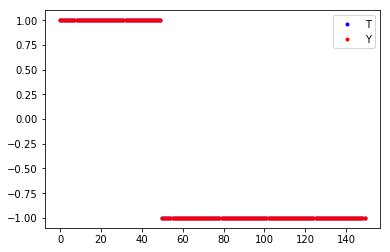

In [33]:
X = df.iloc[:, 0:4]
T = df.iloc[:, 4]
T = T.apply(lambda x: irisdic[x])
T[:50] = 1
T[50:] = -1


pt = Perceptron()
pt.train(X, T.as_matrix(), best_iris_percep[1])
Y = pt.use(X)

acc = np.sum(Y ==T) / len(Y)
print("Accuracy:", acc)

con_matrix = confusion_matrix(Y, T).as_matrix()
print("Confusion Matrix:\n", con_matrix)
precision = con_matrix[1, 1] / (con_matrix[1, 1] + con_matrix[1, 0])
print("Precision:", precision)
recall = con_matrix[1, 1] / (con_matrix[1, 1] + con_matrix[0, 1])
print("Recal:", recall)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(T, '.', color='b', label='T') 
ax.plot(Y, '.', color='r', label='Y') #prediction
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)


Letter: Here you can see a learning rate of .1 was consistently choosen.

In [34]:
print("Best Models:", letter_percepErrs)
best_letter_percep = max(letter_percepErrs,key=lambda item:item[0])
letter_top_accs.append((best_letter_percep[0] , "Percep"))
print("Top Model:", best_letter_percep)

Best Models: [(0.53125, 0.10000000000000001), (0.53125, 0.10000000000000001), (0.5625, 0.10000000000000001), (0.4375, 0.10000000000000001), (0.4375, 0.10000000000000001)]
Top Model: (0.5625, 0.10000000000000001)


Raw X (160, 16)
X (160, 17)
T (160,)
w (17,)
converged at  6
Accuracy: 1.0
Confusion Matrix:
 [[80  0]
 [ 0 80]]
Precision: 1.0
Recal: 1.0


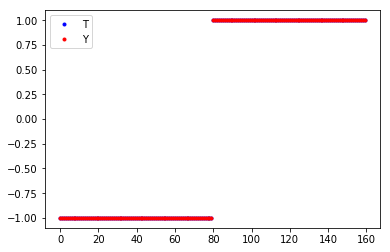

In [35]:
X = df2.iloc[:160, 1:]
T = df2.iloc[:160, 0]
T = T.apply(lambda x: letterDic[x])
T[T == 0] = -1
pt2 = Perceptron()
pt2.train(X, T, best_letter_percep[1])
Y = pt2.use(X)

acc = np.sum(Y ==T) / len(Y)
print("Accuracy:", acc)

con_matrix = confusion_matrix(Y, T).as_matrix()
print("Confusion Matrix:\n", con_matrix)
precision = con_matrix[1, 1] / (con_matrix[1, 1] + con_matrix[1, 0])
print("Precision:", precision)
recall = con_matrix[1, 1] / (con_matrix[1, 1] + con_matrix[0, 1])
print("Recal:", recall)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(T, '.', color='b', label='T') 
ax.plot(Y, '.', color='r', label='Y') #prediction
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

Best Logistic Regression: Logistic Regression has a parameter of alpha and this is used to determine the learning rate. I determined the best learning rate to use in the Kcross validation.

Iris: Here you can see a learning rate of .1 was consistently choosen.

In [36]:
print("Best Models:", iris_logErrs)
best_iris_log = max(iris_logErrs,key=lambda item:item[0])
iris_top_accs.append((best_iris_log[0] , "Log"))
print("Top Model:", best_iris_log)

Best Models: [(1.0, 0.10000000000000001), (0.96666666666666667, 0.10000000000000001), (1.0, 0.10000000000000001), (1.0, 0.10000000000000001), (0.93333333333333335, 0.10000000000000001)]
Top Model: (1.0, 0.10000000000000001)


Raw X (150, 4)
X (150, 5)
T (150, 3)
w (5, 3)
Accuracy 0.986666666667
Confusion Matrix:
 [[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]
Precision: 1.0
Recal: 1.0


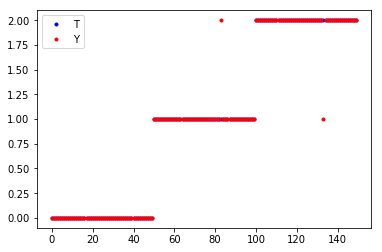

In [37]:
X = df.iloc[:, 0:4]
T = df.iloc[:, 4]
Tin = np.zeros((T.shape[0], 3))
T = T.apply(lambda x: irisdic[x])
Tin[np.arange(150), T.as_matrix()] =1
log = myLog_Regression(3, 4)
log.train(X.as_matrix(), Tin, best_iris_log[1])
Y = log.use(X)

acc = np.sum(Y == T) / len(Y)
print("Accuracy", acc)

# will only look at the 2x2 inside the 3x3
con_matrix = confusion_matrix(Y, T).as_matrix()
print("Confusion Matrix:\n", con_matrix)
precision = con_matrix[1, 1] / (con_matrix[1, 1] + con_matrix[1, 0])
print("Precision:", precision)
recall = con_matrix[1, 1] / (con_matrix[1, 1] + con_matrix[0, 1])
print("Recal:", recall)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(T, '.', color='b', label='T') 
ax.plot(Y, '.', color='r', label='Y') #prediction
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

Letter: Here you can see a learning rate of .1 was consistently choosen.

In [38]:
print("Best Models:", letter_logErrs)
best_letter_log = max(letter_logErrs,key=lambda item:item[0])
letter_top_accs.append((best_letter_log[0] , "Log"))
print("Top Model:", best_letter_log)

Best Models: [(0.78125, 0.10000000000000001), (0.75, 0.10000000000000001), (0.875, 0.10000000000000001), (0.78125, 0.10000000000000001), (0.15625, 0.10000000000000001)]
Top Model: (0.875, 0.10000000000000001)


Raw X (160, 16)
X (160, 17)
T (160, 2)
w (17, 2)
Accuracy 1.0
Confusion Matrix:
 [[80  0]
 [ 0 80]]
Precision: 1.0
Recal: 1.0


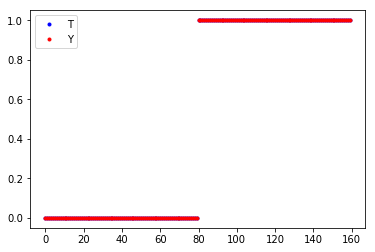

In [39]:
X = df2.iloc[:160, 1:]
T = df2.iloc[:160, 0]
Tin = np.zeros((T.shape[0], 2))
T = T.apply(lambda x: letterDic[x])
T[T == -1] = 0
# Set indicator Matrix 
Tin[:80, 0] = 1
Tin[80:, 1] = 1

letter_log = myLog_Regression(2, 16)
letter_log.train(X.as_matrix(), Tin, best_letter_log[1])
Y = letter_log.use(X)

acc = np.sum(Y == T) / len(Y)
print("Accuracy", acc)

con_matrix = confusion_matrix(Y, T).as_matrix()
print("Confusion Matrix:\n", con_matrix)
precision = con_matrix[1, 1] / (con_matrix[1, 1] + con_matrix[1, 0])
print("Precision:", precision)
recall = con_matrix[1, 1] / (con_matrix[1, 1] + con_matrix[0, 1])
print("Recal:", recall)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(T, '.', color='b', label='T') 
ax.plot(Y, '.', color='r', label='Y') #prediction
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

Best QDA: QDA has no parameters.

Iris

In [40]:
print("Best Models:", iris_qdaErrs)
best_iris_qda = max(iris_qdaErrs,key=lambda item:item[0])
iris_top_accs.append((best_iris_qda[0] , "QDA"))
print("Top Model:", best_iris_qda)

Best Models: [(1.0, None), (0.96666666666666667, None), (1.0, None), (1.0, None), (0.93333333333333335, None)]
Top Model: (1.0, None)


X (150, 4)
T (150,)
Accuracy 0.98
Confusion Matrix:
 [[50  0  0]
 [ 0 48  1]
 [ 0  2 49]]
Precision: 1.0
Recal: 1.0


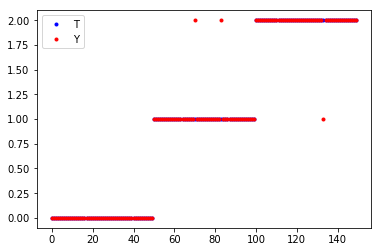

In [41]:
X = df.iloc[:, 0:4]
T = df.iloc[:, 4]
T = T.apply(lambda x: irisdic[x])

qda = myQDA()
qda.train(X, T)
Y =qda.use(X)

print("Accuracy", np.sum(Y == T) / len(Y))


con_matrix = confusion_matrix(Y, T).as_matrix()
print("Confusion Matrix:\n", con_matrix)
precision = con_matrix[1, 1] / (con_matrix[1, 1] + con_matrix[1, 0])
print("Precision:", precision) 
recall = con_matrix[1, 1] / (con_matrix[1, 1] + con_matrix[0, 1])
print("Recal:", recall)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(T, '.', color='b', label='T') 
ax.plot(Y, '.', color='r', label='Y') #prediction
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

Letter

In [42]:
print("Best Models:", letter_qdaErrs)
best_letter_qda = max(letter_qdaErrs,key=lambda item:item[0])
letter_top_accs.append((best_letter_qda[0] , "QDA"))
print("Top Model:", best_letter_qda)

Best Models: [(1.0, None), (1.0, None), (1.0, None), (1.0, None), (1.0, None)]
Top Model: (1.0, None)


X (160, 16)
T (160,)
Accuracy 1.0
Confusion Matrix:
 [[80  0]
 [ 0 80]]
Precision: 1.0
Recal: 1.0


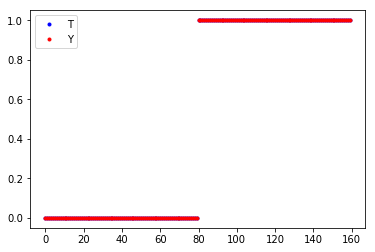

In [43]:
X = df2.iloc[:160, 1:]
T = df2.iloc[:160, 0]
T = T.apply(lambda x: letterDic[x])

letterqda = myQDA()
letterqda.train(X, T)
Y = letterqda.use(X)

print("Accuracy", np.sum(Y == T) / len(Y))

con_matrix = confusion_matrix(Y, T).as_matrix()
print("Confusion Matrix:\n", con_matrix)
precision = con_matrix[1, 1] / (con_matrix[1, 1] + con_matrix[1, 0])
print("Precision:", precision)
recall = con_matrix[1, 1] / (con_matrix[1, 1] + con_matrix[0, 1])
print("Recal:", recall)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(T, '.', color='b', label='T') 
ax.plot(Y, '.', color='r', label='Y') #prediction
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

Best LDA: LDA has no parameters.

Iris

In [44]:
print("Best Models:", iris_ldaErrs)
best_iris_lda = max(iris_ldaErrs,key=lambda item:item[0])
iris_top_accs.append((best_iris_lda[0] , "LDA"))
print("Top Model:", best_iris_lda)

Best Models: [(0.90000000000000002, None), (0.93333333333333335, None), (0.93333333333333335, None), (0.93333333333333335, None), (0.96666666666666667, None)]
Top Model: (0.96666666666666667, None)


Accuracy 0.926666666667
Confusion Matrix:
 [[49  0  0]
 [ 1 48  8]
 [ 0  2 42]]
Precision: 0.979591836735
Recal: 1.0


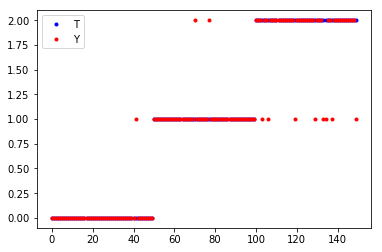

In [45]:
X = df.iloc[:, 0:4]
T = df.iloc[:, 4]
T = T.apply(lambda x: irisdic[x])

lda = myLDA()
lda.train(X, T)
Y = lda.use(X)

print("Accuracy", np.sum(Y == T) / len(Y))


con_matrix = confusion_matrix(Y, T).as_matrix()
print("Confusion Matrix:\n", con_matrix)
precision = con_matrix[1, 1] / (con_matrix[1, 1] + con_matrix[1, 0])
print("Precision:", precision) 
recall = con_matrix[1, 1] / (con_matrix[1, 1] + con_matrix[0, 1])
print("Recal:", recall)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(T, '.', color='b', label='T') 
ax.plot(Y, '.', color='r', label='Y') #prediction
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

Letter

In [46]:
print("Best Models:", letter_ldaErrs)
best_letter_lda = max(letter_ldaErrs,key=lambda item:item[0])
letter_top_accs.append((best_letter_lda[0] , "LDA"))
print("Top Model:", best_letter_lda)

Best Models: [(0.875, None), (0.96875, None), (0.90625, None), (0.84375, None), (0.90625, None)]
Top Model: (0.96875, None)


Accuracy 0.90625
Confusion Matrix:
 [[74  9]
 [ 6 71]]
Precision: 0.922077922078
Recal: 0.8875


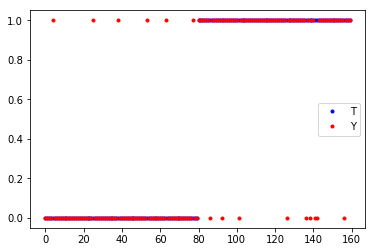

In [47]:
X = df2.iloc[:160, 1:]
T = df2.iloc[:160, 0]
T = T.apply(lambda x: letterDic[x])

letterlda = myLDA()
letterlda.train(X, T)
Y = letterlda.use(X)

print("Accuracy", np.sum(Y == T) / len(Y))

con_matrix = confusion_matrix(Y, T).as_matrix()
print("Confusion Matrix:\n", con_matrix)
precision = con_matrix[1, 1] / (con_matrix[1, 1] + con_matrix[1, 0])
print("Precision:", precision)
recall = con_matrix[1, 1] / (con_matrix[1, 1] + con_matrix[0, 1])
print("Recal:", recall)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(T, '.', color='b', label='T') 
ax.plot(Y, '.', color='r', label='Y') #prediction
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

Top Data Accuracies

In [48]:
print("Top iris accuracies ", iris_top_accs)
print("Top letter accuracies ", letter_top_accs)

Top iris accuracies  [(1.0, 'Percep'), (1.0, 'Log'), (1.0, 'QDA'), (0.96666666666666667, 'LDA')]
Top letter accuracies  [(0.5625, 'Percep'), (0.875, 'Log'), (1.0, 'QDA'), (0.96875, 'LDA')]


For the iris data, all the models are pretty close. All but LDA are consistently around 1 while LDA falls a little short. It is also important to note that a learning rate of .1 was consistenly chosen as the best learning rate. Please look at the perceptron and logistic regression arrays above to confirm.

[1.0, 1.0, 1.0, 0.96666666666666667]


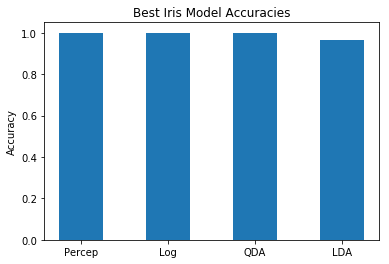

In [49]:
import matplotlib.pyplot as plt
iris_top = []
key = ["Percep", "Log", "QDA", "LDA"]
place = np.arange(4)
for i in range (len(iris_top_accs)):
    iris_top.append(iris_top_accs[i][0])
x_pos = list(range(len(iris_top)))

plt.clf()
plt.bar(left=x_pos, height=iris_top, width=.5)
plt.ylabel('Accuracy')
plt.xticks(x_pos, key)
plt.title("Best Iris Model Accuracies")
print(iris_top)


For the letter data, you can seee that LDA/QDA seems to have consitently higher results than logistic regression or perceptron. It is also important to note that a learning rate of .1 was consistenly chosen as the best learning rate. Please look at the perceptron and logistic regression arrays above to confirm.

[0.5625, 0.875, 1.0, 0.96875]


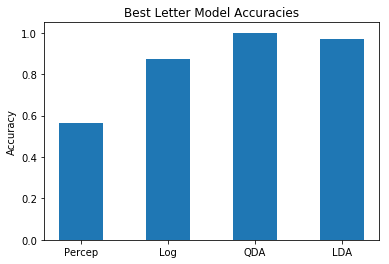

In [50]:
letter_top = []
key = ["Percep", "Log", "QDA", "LDA"]
place = np.arange(4)
for i in range (len(letter_top_accs)):
    letter_top.append(letter_top_accs[i][0])
x_pos = list(range(len(letter_top)))

plt.clf()
plt.bar(left=x_pos, height=letter_top, width=.5)
plt.ylabel('Accuracy')
plt.xticks(x_pos, key)
plt.title("Best Letter Model Accuracies")
print(letter_top)

# Conclusions

I believe the best model is QDA due to it's highscores in both of my datasets and it's consistency. Although in my iris dataset perceptron and logitic regression also matched QDA with LDA cloesly behind. In my letter data, QDA was rarely matched by the other models with perceptron usually being much lower. For both my letter and iris datasets a learning rate of .1 was chosen on a very consistent bases. Although my letter accurcies seemed to be much lower compared to my iris accurcies. I think I can atribute this too the sheer amount of data the letter set had and the restriction I placed on it.

I faced many challenges over the course of this assignment. First and the biggest, was implementing K-cross validation with a vague understanding of how to do so. I understood the basic concept but implementing proved to be a whole other beast. I would recommend showing us how to implement cross validation so I can implement it the correct way and understand the concept fully. Being able to see an implementation of this code would help me learn and understand what is going on. Second, was when I was trying to implement the four different models and this proved harder than it should have been. I had the implementation but I was having a hard time modifying it to work with the new data sets. I would recommend instead of showing us how to implement it with random numbers show use each model on a data set like what was done with the forest fire dataset. Lastly, I would focus more on the formulas we need to know and break them down by what each part is doing and not focus so much on deriving them. All in all, I would reduce the scope of this assignment and further assignments and focus more on teaching the implementation of models and not pseudo code. My last suggestion would be less assignments but more time to do them and larger scopes. I started working on this assignment from the start and still felt like I was desperately running out of time. Regradless, I do apperciate all the extra help I recieved and the extra time alotted. 

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
25 | Data | 
 | 5| Includes description of your data (2 for Iris, 3 for Yours)
 |10| Plots to visualize data (5 for Iris, 5 for yours)
 |10| Reading and analyzing the plots  (5 for Iris, 5 for yours)
15 | Methods | 
 | 5|Summary of Classification models
 | 5|Explanation of codes
 | 5|Cross Validation Function Implementation
30 | Results | Iris 
| 5| Two evaluation metrics
|10| plots for results
| 5| Discussions about parameter choice
|10 | Discussions about classificaion model comparison
20 | Results | Your Data
| 5| Two evaluation metrics
| 5| plots for results
| 5| Discussions about parameter choice
| 5| Discussions about classificaion model comparison
5 | Conclusions 
